In [2]:
import pandas as pd

file_path = "C:/Users/vikra/Downloads/dataset for transactions/bank.xlsx"
df = pd.read_excel(file_path)

df.head()


,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1000000.0,.
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2000000.0,.
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2500000.0,.
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5500000.0,.
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6000000.0,.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116201 entries, 0 to 116200
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Account No           116201 non-null  object        
 1   DATE                 116201 non-null  datetime64[ns]
 2   TRANSACTION DETAILS  113702 non-null  object        
 3   CHQ.NO.              905 non-null     float64       
 4   VALUE DATE           116201 non-null  datetime64[ns]
 5   WITHDRAWAL AMT       53549 non-null   float64       
 6   DEPOSIT AMT          62652 non-null   float64       
 7   BALANCE AMT          116201 non-null  float64       
 8   .                    116201 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 8.0+ MB


In [4]:
df.describe()

,DATE,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT
count,116201,905.000000,116201,5.354900e+04,6.265200e+04,1.162010e+05
mean,2017-05-20 00:08:40.477448448,791614.503867,2017-05-20 00:04:43.288439808,4.489190e+06,3.806586e+06,-1.404852e+09
min,2015-01-01 00:00:00,1.000000,2015-01-01 00:00:00,1.000000e-02,1.000000e-02,-2.045201e+09
25%,2016-05-30 00:00:00,704231.000000,2016-05-30 00:00:00,3.000000e+03,9.900000e+04,-1.690383e+09
50%,2017-06-05 00:00:00,873812.000000,2017-06-05 00:00:00,4.708300e+04,4.265000e+05,-1.661395e+09
75%,2018-05-26 00:00:00,874167.000000,2018-05-26 00:00:00,5.000000e+06,4.746411e+06,-1.236888e+09
max,2019-03-05 00:00:00,874525.000000,2019-03-05 00:00:00,4.594475e+08,5.448000e+08,8.500000e+06
std,NaN,151205.932910,NaN,1.084850e+07,8.683093e+06,5.348202e+08


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [7]:
df.set_index('DATE', inplace=True)

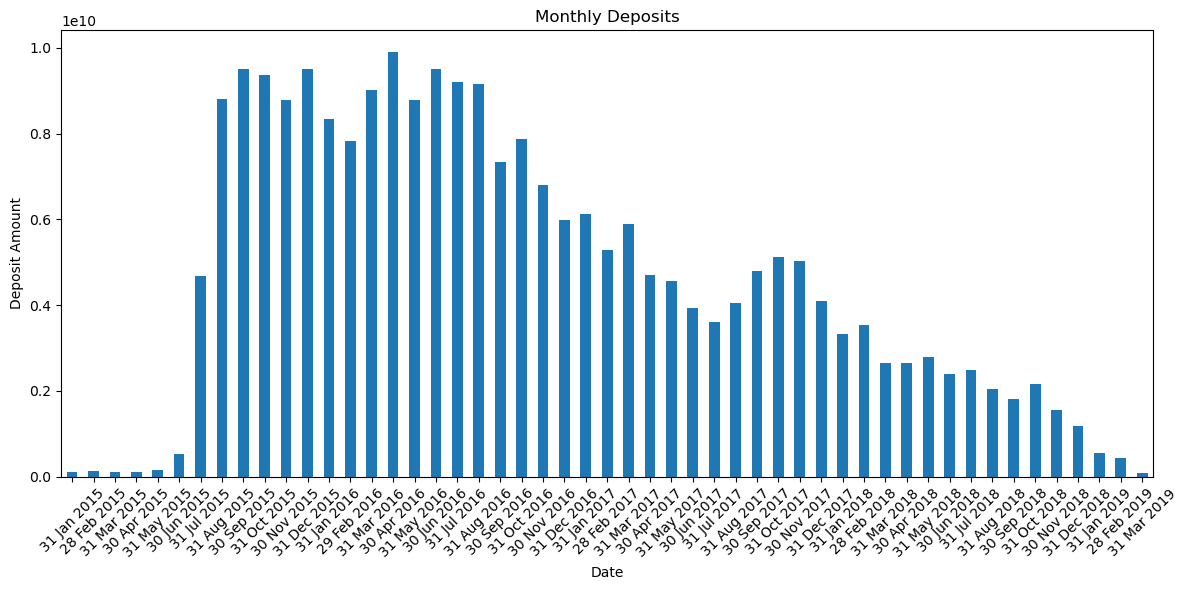

In [8]:
import matplotlib.pyplot as plt

monthly_deposit = df['DEPOSIT AMT'].resample('ME').sum()

# Format index to show Day Month Year (e.g. 01 Jan 2024)
monthly_deposit.index = monthly_deposit.index.strftime('%d %b %Y')

# Plotting
plt.figure(figsize=(12, 6))
monthly_deposit.plot(kind='bar')
plt.title('Monthly Deposits')
plt.xlabel('Date')
plt.ylabel('Deposit Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


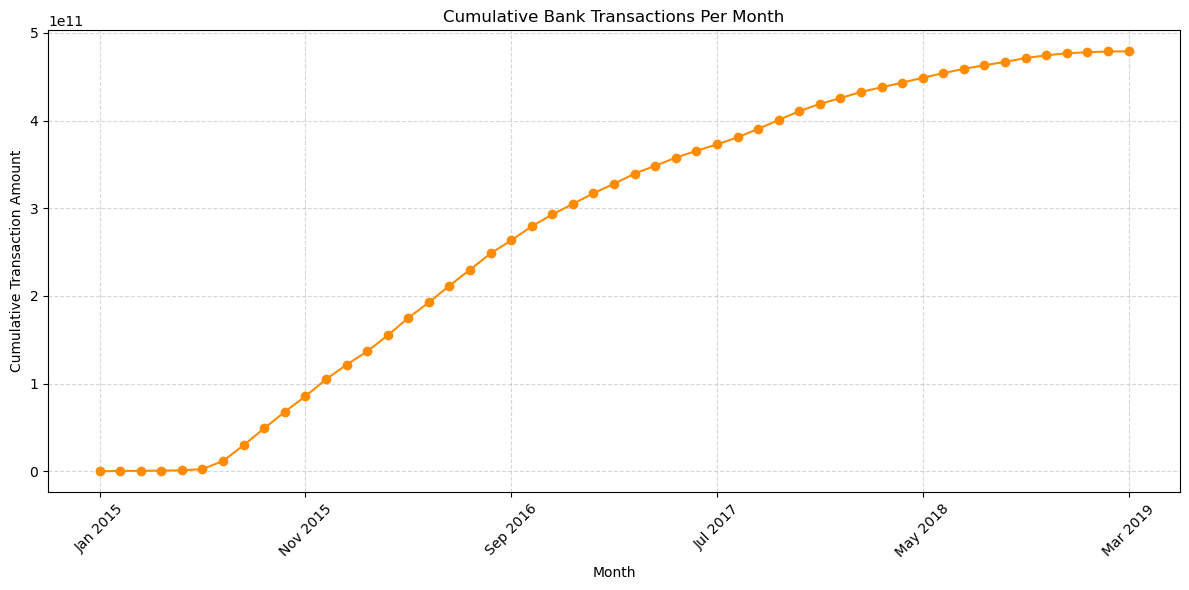

In [9]:
import matplotlib.pyplot as plt

# Step 1: Create total transaction amount per row (withdrawal + deposit)
df['TOTAL_TRANSACTIONS'] = df['DEPOSIT AMT'].fillna(0) + df['WITHDRAWAL AMT'].fillna(0)

# Step 2: Resample monthly totals
monthly_total = df['TOTAL_TRANSACTIONS'].resample('ME').sum()

# Step 3: Calculate cumulative sum
cumulative_total = monthly_total.cumsum()

# Step 4: Format index to show Month Year only
cumulative_total.index = cumulative_total.index.strftime('%b %Y')

# Step 5: Plot the damn thing
plt.figure(figsize=(12, 6))
cumulative_total.plot(kind='line', marker='o', color='darkorange')
plt.title('Cumulative Bank Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Cumulative Transaction Amount')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [10]:
# Set a threshold — say 90th percentile of withdrawals
threshold = df['WITHDRAWAL AMT'].quantile(0.9)

# Find suspicious withdrawals
suspicious_withdrawals = df[df['WITHDRAWAL AMT'] > threshold]
print(suspicious_withdrawals[['WITHDRAWAL AMT']])


            WITHDRAWAL AMT
DATE                      
2018-10-31    3.540000e+08
2016-01-30    1.700000e+08
2016-01-30    3.000000e+07
2018-09-28    1.030203e+08
2016-02-26    1.300000e+08
...                    ...
2017-12-22    1.590154e+07
2017-12-27    1.616309e+07
2018-01-11    1.523439e+07
2018-01-15    1.661924e+07
2018-02-26    1.743497e+07

[2491 rows x 1 columns]


In [11]:
txn_per_day = df.resample('D').size()

# Days with more than say 5 transactions
suspicious_days = txn_per_day[txn_per_day > 5]
print(suspicious_days)

DATE
2015-01-02     10
2015-01-05     12
2015-01-06      6
2015-01-10     12
2015-01-15     11
             ... 
2019-02-28     73
2019-03-01     81
2019-03-02     84
2019-03-04     51
2019-03-05    111
Length: 1196, dtype: int64


In [12]:
# Sort by datetime if not already
df_sorted = df.sort_index()

# Difference between two consecutive withdrawals
df_sorted['WITHDRAWAL SHIFT'] = df_sorted['WITHDRAWAL AMT'].shift(1)
df_sorted['WITHDRAWAL DIFF'] = abs(df_sorted['WITHDRAWAL AMT'] - df_sorted['WITHDRAWAL SHIFT'])

# Flag if two withdrawals are very close in time & high value
suspicious_pairs = df_sorted[
    (df_sorted['WITHDRAWAL DIFF'] < 100) & 
    (df_sorted['WITHDRAWAL AMT'] > 1000)
]
print(suspicious_pairs[['WITHDRAWAL AMT', 'WITHDRAWAL SHIFT', 'WITHDRAWAL DIFF']])


            WITHDRAWAL AMT  WITHDRAWAL SHIFT  WITHDRAWAL DIFF
DATE                                                         
2015-03-11          1236.0            1236.0              0.0
2015-06-09       6000000.0         6000000.0              0.0
2015-06-13      15000000.0        15000000.0              0.0
2015-06-17       5000000.0         5000000.0              0.0
2015-06-20      15000000.0        15000000.0              0.0
...                    ...               ...              ...
2019-03-05        500000.0          500000.0              0.0
2019-03-05         10000.0           10000.0              0.0
2019-03-05          5000.0            5000.0              0.0
2019-03-05       1000000.0         1000000.0              0.0
2019-03-05        300000.0          300000.0              0.0

[4947 rows x 3 columns]


<Axes: title={'center': 'Cumulative Withdrawals Over Time'}, xlabel='DATE'>

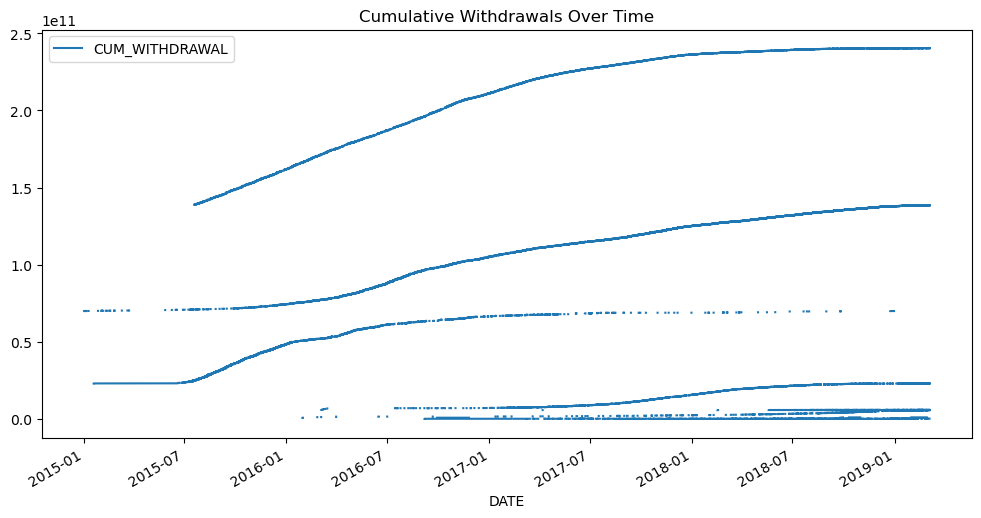

In [30]:
df_reset = df.reset_index()

df_reset.plot(x='DATE', y='CUM_WITHDRAWAL', kind='line', title='Cumulative Withdrawals Over Time', figsize=(12,6))



In [21]:
# Deposits over ₹1,000,000
high_value_deposits = df[df['DEPOSIT AMT'] > 1_000_000]
print("High-value deposits (₹1 million+):")
display(high_value_deposits)


High-value deposits (₹1 million+):


,Account No,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.,TOTAL_TRANSACTIONS,CUM_WITHDRAWAL
DATE,,,,,,,,,,
2017-08-01,409000611074',TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.00,5.500000e+06,.,3000000.00,NaN
2018-10-26,409000425051',TRF FROM Indiaforensic SERVICES,NaN,2018-10-26,NaN,15000000.00,4.592003e+05,.,15000000.00,NaN
2018-12-17,409000425051',TRF FRM Indiaforensic SERVICES,NaN,2018-12-17,NaN,2447600.00,-3.544308e+08,.,2447600.00,NaN
2019-01-10,409000425051',TRF FROM Indiaforensic SERVICES,NaN,2019-01-10,NaN,1539665.00,-3.554308e+08,.,1539665.00,NaN
2019-03-02,409000425051',FDRL/INTERNAL FUND TRANSFE,NaN,2019-03-02,NaN,2535326.00,-3.567348e+08,.,2535326.00,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-01-15,409000362497',INDIAN OIL CORPORATION LT,NaN,2019-01-15,NaN,1368296.97,-1.899861e+09,.,1368296.97,NaN
2019-01-17,409000362497',FDRL/INTERNAL FUND TRANSFE,NaN,2019-01-17,NaN,3000000.00,-1.896866e+09,.,3000000.00,NaN
2019-02-19,409000362497',NEFT/SBIN219050779670/Indfor,NaN,2019-02-19,NaN,2000000.00,-1.900949e+09,.,2000000.00,NaN


In [22]:
# Withdrawals that are perfect multiples of ₹1,000 or ₹10,000
round_withdrawals = df[df['WITHDRAWAL AMT'] % 10000 == 0]
print("Withdrawals that are round numbers (multiples of ₹10,000):")
display(round_withdrawals)


Withdrawals that are round numbers (multiples of ₹10,000):


,Account No,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.,TOTAL_TRANSACTIONS,CUM_WITHDRAWAL
DATE,,,,,,,,,,
2017-08-16,409000611074',INDO GIBL Indiaforensic STL30071,NaN,2017-08-16,20000.0,NaN,5.652918e+06,.,20000.0,2.847082e+06
2017-09-06,409000611074',INDO GIBL Indiaforensic STL06081,NaN,2017-09-06,40000.0,NaN,5.094868e+06,.,40000.0,3.405132e+06
2017-09-25,409000611074',INDO GIBL Indiaforensic STL02091,NaN,2017-09-25,20000.0,NaN,2.173202e+06,.,20000.0,6.326798e+06
2017-09-25,409000611074',INDO GIBL Indiaforensic STL03091,NaN,2017-09-25,10000.0,NaN,2.163202e+06,.,10000.0,6.336798e+06
2017-11-01,409000611074',INDO GIBL Indiaforensic STL31101,NaN,2017-11-01,80000.0,NaN,6.953120e+05,.,80000.0,1.330469e+07
...,...,...,...,...,...,...,...,...,...,...
2018-07-03,409000362497',Sweep Trf To: 40900036427,NaN,2018-07-03,270000.0,NaN,-1.891947e+09,.,270000.0,2.392467e+11
2018-07-16,409000362497',ACH DR NATIONAL PAYMENT C,NaN,2018-07-16,10000.0,NaN,-1.901455e+09,.,10000.0,2.393994e+11
2018-08-13,409000362497',ACH DR NATIONAL PAYMENT C,NaN,2018-08-13,10000.0,NaN,-1.900487e+09,.,10000.0,2.397187e+11


In [23]:
# Check vague/missing particulars for high-value deposits
vague_terms = ['TRF', 'TRANSFER', 'CASH', 'SELF', '']
suspicious_particulars = df[(df['DEPOSIT AMT'] > 1_000_000) & (df['TRANSACTION DETAILS'].str.upper().fillna('').isin(vague_terms))]
print("High-value deposits with vague/missing particulars:")
display(suspicious_particulars)


High-value deposits with vague/missing particulars:


,Account No,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.,TOTAL_TRANSACTIONS,CUM_WITHDRAWAL
DATE,,,,,,,,,,
2015-10-29,1196711',NaN,NaN,2015-10-29,NaN,5000000.0,-1.475274e+09,.,5000000.0,NaN
2015-10-29,1196711',NaN,NaN,2015-10-29,NaN,5000000.0,-1.470274e+09,.,5000000.0,NaN
2015-11-07,1196711',NaN,NaN,2015-11-07,NaN,10000000.0,-1.557015e+09,.,10000000.0,NaN
2015-11-07,1196711',NaN,NaN,2015-11-07,NaN,10000000.0,-1.547015e+09,.,10000000.0,NaN
2015-12-03,1196711',NaN,NaN,2015-12-03,NaN,10000000.0,-1.544866e+09,.,10000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2016-09-16,409000362497',NaN,NaN,2016-09-16,NaN,15000000.0,-1.637700e+09,.,15000000.0,NaN
2016-09-16,409000362497',NaN,NaN,2016-09-16,NaN,15000000.0,-1.622700e+09,.,15000000.0,NaN
2016-09-20,409000362497',NaN,NaN,2016-09-20,NaN,15000000.0,-1.690846e+09,.,15000000.0,NaN


In [29]:
# Total number of transactions
total_transactions = len(df)

# Number of high-value deposits
high_value_deposits = df[df['DEPOSIT AMT'] > 1_000_000]
num_high_value_deposits = len(high_value_deposits)

# Calculate percentage
percentage_high_value_deposits = (num_high_value_deposits / total_transactions) * 100

# Display result
print(f"High-value deposits over ₹1M: {num_high_value_deposits}")
print(f"Total transactions: {total_transactions}")
print(f"Percentage of high-value deposits: {percentage_high_value_deposits:.2f}%")


High-value deposits over ₹1M: 22913
Total transactions: 116201
Percentage of high-value deposits: 19.72%


In [31]:
# Total number of transactions in the dataset
total_transactions = len(df)

# Filter for high-value withdrawals (withdrawal amount > ₹1,000,000)
high_value_withdrawals = df[df['WITHDRAWAL AMT'] > 1_000_000]
num_high_value_withdrawals = len(high_value_withdrawals)

# Calculate the percentage of high-value withdrawals relative to all transactions
percentage_high_value_withdrawals = (num_high_value_withdrawals / total_transactions) * 100

# Display the results
print(f"High-Value Withdrawals (> ₹1M): {num_high_value_withdrawals}")
print(f"Total Transactions: {total_transactions}")
print(f"High-Value Withdrawals Percentage: {percentage_high_value_withdrawals:.2f}%")


High-Value Withdrawals (> ₹1M): 18198
Total Transactions: 116201
High-Value Withdrawals Percentage: 15.66%


In [32]:
# Assuming your DataFrame 'df' already has a proper DATE column (converted to datetime)

# For Deposits: find duplicates where the deposit amount and transaction details are the same on the same day.
duplicate_deposits_same_sender = df[
    df['DEPOSIT AMT'].notna()
].groupby(['DATE', 'DEPOSIT AMT', 'TRANSACTION DETAILS']).filter(lambda x: len(x) > 1)

print("Number of duplicate deposits by the same sender on the same day:",
      len(duplicate_deposits_same_sender))


# For Withdrawals: find duplicates where the withdrawal amount and transaction details are the same on the same day.
duplicate_withdrawals_same_receiver = df[
    df['WITHDRAWAL AMT'].notna()
].groupby(['DATE', 'WITHDRAWAL AMT', 'TRANSACTION DETAILS']).filter(lambda x: len(x) > 1)

print("Number of duplicate withdrawals to the same receiver on the same day:",
      len(duplicate_withdrawals_same_receiver))


Number of duplicate deposits by the same sender on the same day: 5188
Number of duplicate withdrawals to the same receiver on the same day: 14893


In [34]:
import pandas as pd

# Make sure your dataset is already loaded into 'df'
total_transactions = len(df)

# Duplicate deposits: Group by DATE, DEPOSIT AMT, and TRANSACTION DETAILS
dup_deposits_same_sender = df[df['DEPOSIT AMT'].notna()] \
    .groupby(['DATE', 'DEPOSIT AMT', 'TRANSACTION DETAILS']) \
    .filter(lambda x: len(x) > 1)
num_dup_deposits_same_sender = len(dup_deposits_same_sender)

# Duplicate withdrawals: Group by DATE, WITHDRAWAL AMT, and TRANSACTION DETAILS
dup_withdrawals_same_receiver = df[df['WITHDRAWAL AMT'].notna()] \
    .groupby(['DATE', 'WITHDRAWAL AMT', 'TRANSACTION DETAILS']) \
    .filter(lambda x: len(x) > 1)
num_dup_withdrawals_same_receiver = len(dup_withdrawals_same_receiver)

# Total duplicate transactions (assuming deposits and withdrawals are mutually exclusive)
num_total_duplicates = num_dup_deposits_same_sender + num_dup_withdrawals_same_receiver

# Calculate the percentage
percentage_duplicates = (num_total_duplicates / total_transactions) * 100

print("Total Transactions:", total_transactions)
print("Duplicate Deposits (same sender on same day):", num_dup_deposits_same_sender)
print("Duplicate Withdrawals (same receiver on same day):", num_dup_withdrawals_same_receiver)
print(f"Percentage of transactions fitting the duplicate criteria: {percentage_duplicates:.2f}%")


Total Transactions: 116201
Duplicate Deposits (same sender on same day): 5188
Duplicate Withdrawals (same receiver on same day): 14893
Percentage of transactions fitting the duplicate criteria: 17.28%


In [35]:
import pandas as pd

# Assuming df is already loaded and has the columns including 'TRANSACTION DETAILS'
# For consistency, ensure the "TRANSACTION DETAILS" column is a string and uppercase
df['TRANSACTION DETAILS'] = df['TRANSACTION DETAILS'].astype(str).str.upper()

# Define vague/suspicious keywords for transaction details
vague_terms = ['TRF', 'TRANSFER', 'CASH', 'SELF']

# Filter rows where the "TRANSACTION DETAILS" contain any of these keywords
# (This is a heuristic — adjust vague_terms as needed)
suspicious_transactions = df[df['TRANSACTION DETAILS'].str.contains('|'.join(vague_terms), na=False)]
num_suspicious = len(suspicious_transactions)

# Calculate total number of transactions
total_transactions = len(df)

# Calculate the percentage of suspicious transactions
percentage_suspicious = (num_suspicious / total_transactions) * 100

# Print out the result
print("Number of suspicious transactions (vague/missing details):", num_suspicious)
print("Total transactions:", total_transactions)
print(f"Percentage of suspicious transactions: {percentage_suspicious:.2f}%")


Number of suspicious transactions (vague/missing details): 30194
Total transactions: 116201
Percentage of suspicious transactions: 25.98%


In [37]:
import pandas as pd

# If your 'DATE' column is set as the index, reset it:
if 'DATE' not in df.columns:
    df = df.reset_index()

# ----- CONDITION 1: HIGH-VALUE (Case 1) -----
# A transaction is high-value if its deposit OR withdrawal amount is greater than 1,000,000
mask_high_value = (df['DEPOSIT AMT'] > 1_000_000) | (df['WITHDRAWAL AMT'] > 1_000_000)

# ----- CONDITION 2: DUPLICATE TRANSACTIONS (Case 2) -----
# Define duplicate for deposits: same DATE, same DEPOSIT AMT, and same TRANSACTION DETAILS
mask_dup_deposits = df['DEPOSIT AMT'].notna() & df.duplicated(subset=['DATE', 'DEPOSIT AMT', 'TRANSACTION DETAILS'], keep=False)
# Define duplicate for withdrawals: same DATE, same WITHDRAWAL AMT, and same TRANSACTION DETAILS
mask_dup_withdrawals = df['WITHDRAWAL AMT'].notna() & df.duplicated(subset=['DATE', 'WITHDRAWAL AMT', 'TRANSACTION DETAILS'], keep=False)
# Overall duplicate mask: either duplicate deposits or duplicate withdrawals
mask_duplicates = mask_dup_deposits | mask_dup_withdrawals

# ----- CONDITION 3: SUSPICIOUS TRANSACTION DETAILS (Case 3) -----
# Define suspicious (vague) keywords (adjust as needed)
vague_terms = ['TRF', 'TRANSFER', 'CASH', 'SELF']
# Convert transaction details to uppercase for uniform matching and check for keywords
mask_suspicious = df['TRANSACTION DETAILS'].astype(str).str.upper().str.contains('|'.join(vague_terms), na=False)

# ----- OVERLAP: APPLY ALL CONDITIONS -----
# Only transactions that satisfy all three conditions:
overlap_mask = mask_high_value & mask_duplicates & mask_suspicious
overlap_transactions = df[overlap_mask]

# ----- RESULTS -----
num_overlap = len(overlap_transactions)
total_transactions = len(df)
percentage_overlap = (num_overlap / total_transactions) * 100

print("Number of transactions overlapping (Case 1, 2 & 3):", num_overlap)
print("Total transactions:", total_transactions)
print(f"Percentage of overlapping transactions: {percentage_overlap:.2f}%")


Number of transactions overlapping (Case 1, 2 & 3): 6965
Total transactions: 116201
Percentage of overlapping transactions: 5.99%


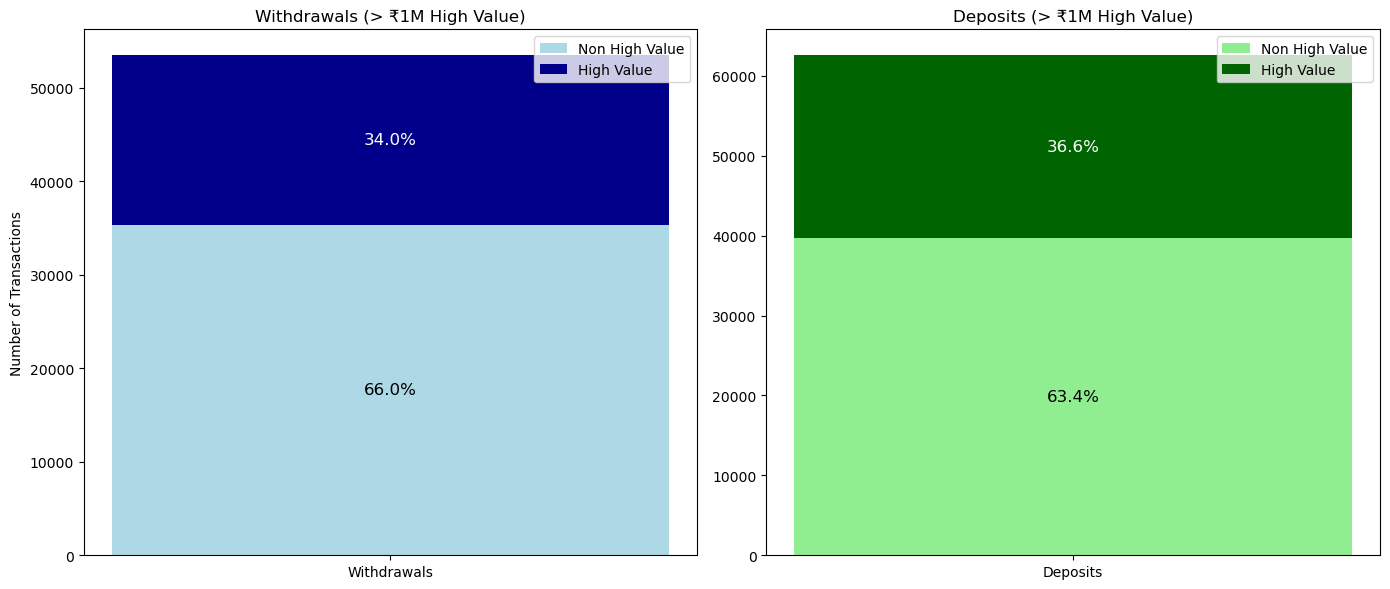

In [40]:
withdrawals = df[df['WITHDRAWAL AMT'].notna()]
total_withdrawals = len(withdrawals)
high_value_withdrawals = withdrawals[withdrawals['WITHDRAWAL AMT'] > 1_000_000]
num_high_value_withdrawals = len(high_value_withdrawals)
non_high_value_withdrawals = total_withdrawals - num_high_value_withdrawals

# Calculate percentages for withdrawals
perc_high_value_withdrawals = (num_high_value_withdrawals / total_withdrawals * 100) if total_withdrawals else 0
perc_non_high_value_withdrawals = (non_high_value_withdrawals / total_withdrawals * 100) if total_withdrawals else 0

# --- FOR DEPOSITS ---
deposits = df[df['DEPOSIT AMT'].notna()]
total_deposits = len(deposits)
high_value_deposits = deposits[deposits['DEPOSIT AMT'] > 1_000_000]
num_high_value_deposits = len(high_value_deposits)
non_high_value_deposits = total_deposits - num_high_value_deposits

# Calculate percentages for deposits
perc_high_value_deposits = (num_high_value_deposits / total_deposits * 100) if total_deposits else 0
perc_non_high_value_deposits = (non_high_value_deposits / total_deposits * 100) if total_deposits else 0

# --- Plotting ---
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Withdrawals (Stacked Bar Chart)
ax[0].bar('Withdrawals', non_high_value_withdrawals, color='lightblue', label='Non High Value')
ax[0].bar('Withdrawals', num_high_value_withdrawals, bottom=non_high_value_withdrawals, 
          color='darkblue', label='High Value')
ax[0].set_title('Withdrawals (> ₹1M High Value)')
ax[0].set_ylabel('Number of Transactions')
ax[0].legend()

# Annotate percentages on withdrawals
ax[0].text(0, non_high_value_withdrawals/2, f"{perc_non_high_value_withdrawals:.1f}%", 
           color='black', ha='center', va='center', fontsize=12)
ax[0].text(0, non_high_value_withdrawals + num_high_value_withdrawals/2, f"{perc_high_value_withdrawals:.1f}%", 
           color='white', ha='center', va='center', fontsize=12)

# Plot for Deposits (Stacked Bar Chart)
ax[1].bar('Deposits', non_high_value_deposits, color='lightgreen', label='Non High Value')
ax[1].bar('Deposits', num_high_value_deposits, bottom=non_high_value_deposits, 
          color='darkgreen', label='High Value')
ax[1].set_title('Deposits (> ₹1M High Value)')
ax[1].legend()

# Annotate percentages on deposits
ax[1].text(0, non_high_value_deposits/2, f"{perc_non_high_value_deposits:.1f}%", 
           color='black', ha='center', va='center', fontsize=12)
ax[1].text(0, non_high_value_deposits + num_high_value_deposits/2, f"{perc_high_value_deposits:.1f}%", 
           color='white', ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()


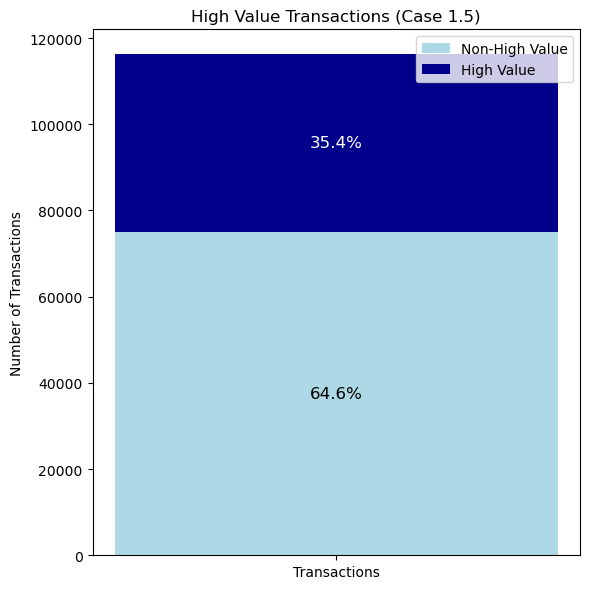

In [41]:
total_transactions = len(df)

# Create a mask for high value transactions (either deposit or withdrawal above ₹1M)
mask_high_value = (df['DEPOSIT AMT'] > 1_000_000) | (df['WITHDRAWAL AMT'] > 1_000_000)
num_high_value_transactions = len(df[mask_high_value])
num_non_high_value_transactions = total_transactions - num_high_value_transactions

# Calculate percentages for annotation purposes
perc_high = (num_high_value_transactions / total_transactions) * 100
perc_non_high = (num_non_high_value_transactions / total_transactions) * 100

# Create a stacked bar chart for the overall transactions
labels = ['Transactions']
non_high_value = [num_non_high_value_transactions]
high_value = [num_high_value_transactions]

fig, ax = plt.subplots(figsize=(6, 6))
# Plot non-high value transactions as the bottom segment (light blue)
ax.bar(labels, non_high_value, color='lightblue', label='Non-High Value')
# Plot high value transactions on top (dark blue)
ax.bar(labels, high_value, bottom=non_high_value, color='darkblue', label='High Value')

ax.set_title('High Value Transactions (Case 1.5)')
ax.set_ylabel('Number of Transactions')
ax.legend()

# Annotate the percentages on each segment
ax.text(0, non_high_value[0] / 2, f"{perc_non_high:.1f}%", ha='center', va='center', color='black', fontsize=12)
ax.text(0, non_high_value[0] + high_value[0] / 2, f"{perc_high:.1f}%", ha='center', va='center', color='white', fontsize=12)

plt.tight_layout()
plt.show()


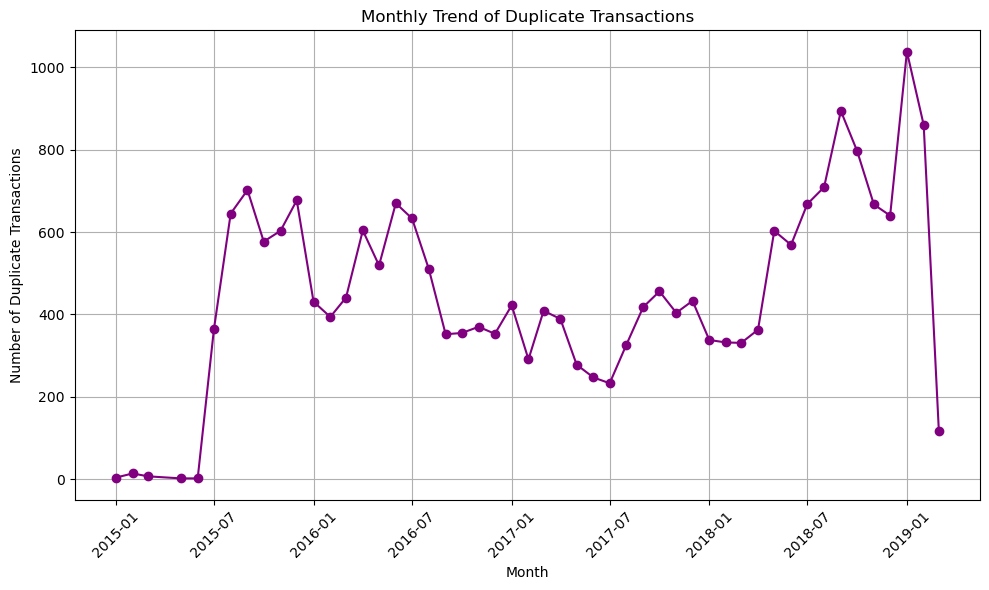

In [44]:
dup_deposits = df[df['DEPOSIT AMT'].notna()].groupby(['DATE', 'DEPOSIT AMT', 'TRANSACTION DETAILS']).filter(lambda x: len(x) > 1)
dup_withdrawals = df[df['WITHDRAWAL AMT'].notna()].groupby(['DATE', 'WITHDRAWAL AMT', 'TRANSACTION DETAILS']).filter(lambda x: len(x) > 1)

# Combine the duplicates from deposits and withdrawals (and remove duplicates across the two groups)
duplicate_transactions = pd.concat([dup_deposits, dup_withdrawals]).drop_duplicates()

# Aggregate duplicate transactions by month
df['Month'] = df['DATE'].dt.to_period('M')
monthly_duplicates = duplicate_transactions.groupby('Month').size()

# Convert PeriodIndex to Timestamp for plotting
monthly_duplicates.index = monthly_duplicates.index.to_timestamp()

# Plot the monthly count of duplicate transactions as a line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_duplicates.index, monthly_duplicates.values, marker='o', linestyle='-', color='purple')
plt.title('Monthly Trend of Duplicate Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Duplicate Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Total transactions: 116201
Suspicious transactions: 30194
Percentage suspicious: 25.98%


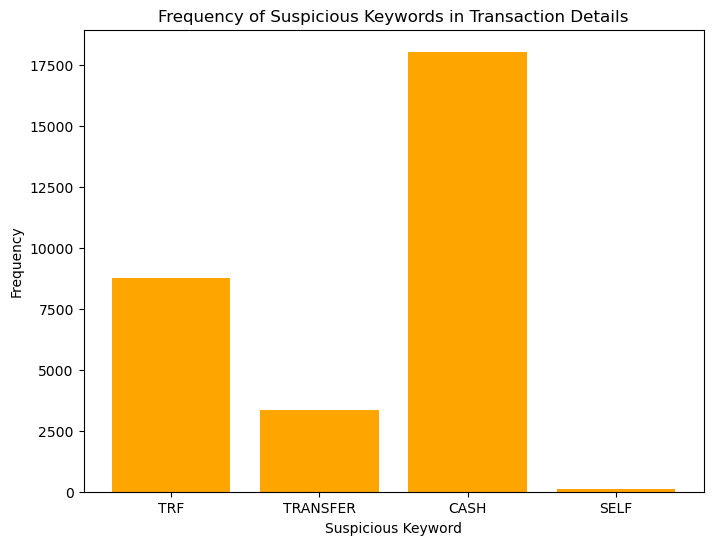

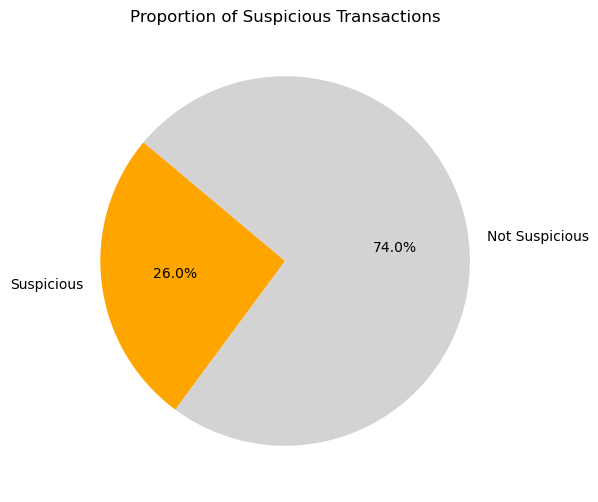

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Data Cleaning
df['TRANSACTION DETAILS'] = df['TRANSACTION DETAILS'].astype(str).str.upper().str.strip()
df['TRANSACTION DETAILS'] = df['TRANSACTION DETAILS'].fillna("")


# Step 2: Define Suspicious Keywords
suspicious_keywords = ['TRF', 'TRANSFER', 'CASH', 'SELF']

# Step 3: Flag Suspicious Transactions
mask_suspicious = df['TRANSACTION DETAILS'].str.contains('|'.join(suspicious_keywords), na=False)
suspicious_transactions = df[mask_suspicious]

# Step 4: Quantify
total_transactions = len(df)
num_suspicious = len(suspicious_transactions)
percentage_suspicious = (num_suspicious / total_transactions) * 100

print("Total transactions:", total_transactions)
print("Suspicious transactions:", num_suspicious)
print(f"Percentage suspicious: {percentage_suspicious:.2f}%")

# Step 5: Visualize - Bar Chart of Keyword Frequency
keyword_counts = {}
for keyword in suspicious_keywords:
    # Count occurrence of each keyword
    keyword_counts[keyword] = df['TRANSACTION DETAILS'].str.contains(keyword).sum()

plt.figure(figsize=(8, 6))
plt.bar(keyword_counts.keys(), keyword_counts.values(), color='orange')
plt.title('Frequency of Suspicious Keywords in Transaction Details')
plt.xlabel('Suspicious Keyword')
plt.ylabel('Frequency')
plt.show()

# Optional: Pie chart of suspicious vs non-suspicious transactions
labels = ['Suspicious', 'Not Suspicious']
sizes = [num_suspicious, total_transactions - num_suspicious]
colors = ['orange', 'lightgray']
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Suspicious Transactions')
plt.show()


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install matplotlib-venn
from matplotlib_venn import venn3

# Ensure DATE is a column (reset index if DATE was set as index)
if 'DATE' not in df.columns:
    df = df.reset_index()

# --- Condition for Case 1: High-Value Transactions ---
mask_high_value = (df['DEPOSIT AMT'] > 1_000_000) | (df['WITHDRAWAL AMT'] > 1_000_000)
set_high_value = set(df[mask_high_value].index)

# --- Condition for Case 2: Duplicate Transactions on the Same Day ---
# For deposits:
mask_dup_deposits = df['DEPOSIT AMT'].notna() & df.duplicated(subset=['DATE', 'DEPOSIT AMT', 'TRANSACTION DETAILS'], keep=False)
# For withdrawals:
mask_dup_withdrawals = df['WITHDRAWAL AMT'].notna() & df.duplicated(subset=['DATE', 'WITHDRAWAL AMT', 'TRANSACTION DETAILS'], keep=False)
mask_duplicates = mask_dup_deposits | mask_dup_withdrawals
set_duplicates = set(df[mask_duplicates].index)

# --- Condition for Case 3: Suspicious Transaction Details ---
suspicious_keywords = ['TRF', 'TRANSFER', 'CASH', 'SELF']
mask_suspicious = df['TRANSACTION DETAILS'].astype(str).str.upper().str.contains('|'.join(suspicious_keywords), na=False)
set_suspicious = set(df[mask_suspicious].index)


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45439 sha256=0772e9a6d8de1639bf452e095bec14140d9906774b7cdfccf18d7b1133ee0601
  Stored in directory: c:\users\vikra\appdata\local\pip\cache\wheels\c2\47\0c\f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn


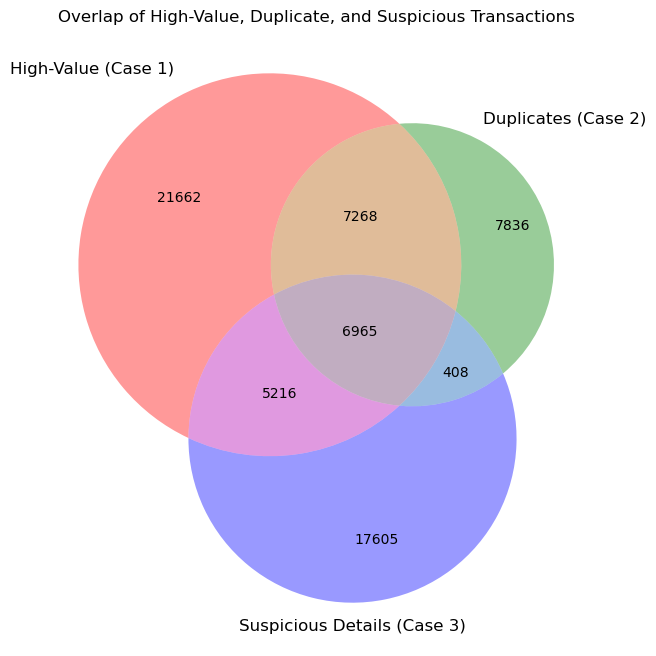

In [49]:
# Plot Venn Diagram
plt.figure(figsize=(8, 8))
venn3([set_high_value, set_duplicates, set_suspicious], 
      ('High-Value (Case 1)', 'Duplicates (Case 2)', 'Suspicious Details (Case 3)'))
plt.title('Overlap of High-Value, Duplicate, and Suspicious Transactions')
plt.show()


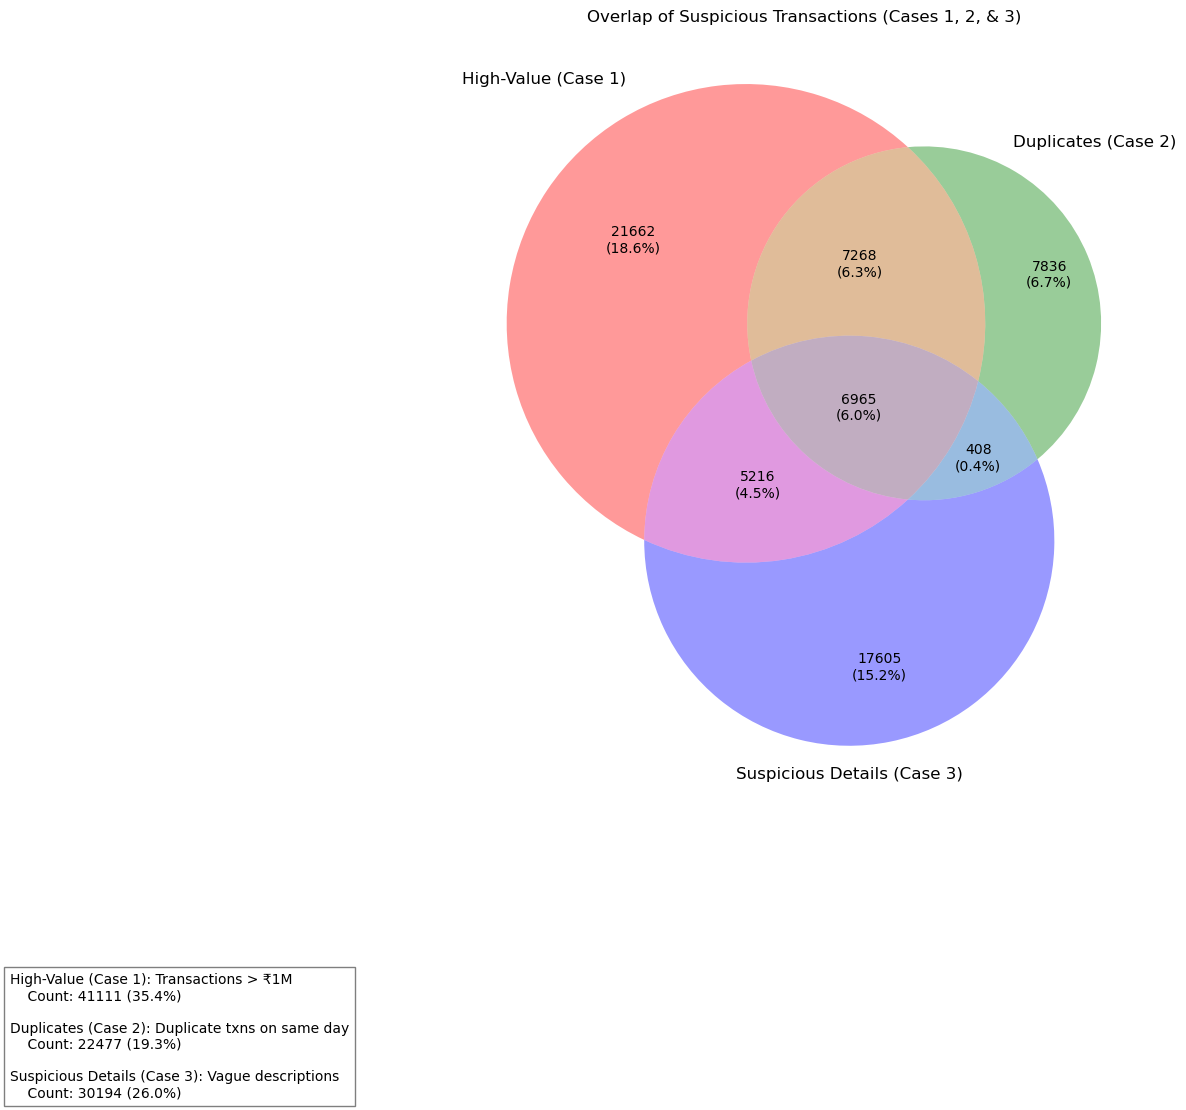

In [50]:
total = len(df)

# --- Define Conditions for Each Case ---
# Case 1: High-Value Transactions (either deposit or withdrawal > ₹1M)
mask_high_value = (df['DEPOSIT AMT'] > 1_000_000) | (df['WITHDRAWAL AMT'] > 1_000_000)

# Case 2: Duplicate Transactions on the Same Day 
# (For deposits and withdrawals, using 'DATE', amount, and 'TRANSACTION DETAILS')
mask_dup_deposits = df['DEPOSIT AMT'].notna() & df.duplicated(subset=['DATE', 'DEPOSIT AMT', 'TRANSACTION DETAILS'], keep=False)
mask_dup_withdrawals = df['WITHDRAWAL AMT'].notna() & df.duplicated(subset=['DATE', 'WITHDRAWAL AMT', 'TRANSACTION DETAILS'], keep=False)
mask_duplicates = mask_dup_deposits | mask_dup_withdrawals

# Case 3: Suspicious Transaction Details
# We flag transactions whose details contain any of these vague keywords.
suspicious_keywords = ['TRF', 'TRANSFER', 'CASH', 'SELF']
mask_suspicious = df['TRANSACTION DETAILS'].astype(str).str.upper().str.contains('|'.join(suspicious_keywords), na=False)

# --- Create Sets (using DataFrame index) ---
set_high = set(df[mask_high_value].index)
set_dup = set(df[mask_duplicates].index)
set_susp = set(df[mask_suspicious].index)

# --- Compute Counts ---
hv = len(set_high)
dup = len(set_dup)
susp = len(set_susp)

# Compute intersections (using set intersections)
hv_dup = len(set_high & set_dup)
hv_susp = len(set_high & set_susp)
dup_susp = len(set_dup & set_susp)
all_three = len(set_high & set_dup & set_susp)

# --- Compute Region Sizes for venn3 ---
# In a 3-set Venn diagram with sets A, B, C:
# A only: |A| - |A∩B| - |A∩C| + |A∩B∩C|
only_high = hv - hv_dup - hv_susp + all_three
only_dup = dup - hv_dup - dup_susp + all_three
only_susp = susp - hv_susp - dup_susp + all_three
# Regions with intersections excluding the triple-intersection:
high_dup_only = hv_dup - all_three
high_susp_only = hv_susp - all_three
dup_susp_only = dup_susp - all_three
# All three region remains as is: all_three

region_values = {
    '100': only_high,       # Only High-Value
    '010': only_dup,        # Only Duplicates
    '001': only_susp,       # Only Suspicious Details
    '110': high_dup_only,   # High-Value & Duplicates (not Suspicious)
    '101': high_susp_only,  # High-Value & Suspicious (not Duplicates)
    '011': dup_susp_only,   # Duplicates & Suspicious (not High-Value)
    '111': all_three        # All three overlap
}

# --- Create Venn Diagram ---
plt.figure(figsize=(10,10))
# Pass the subset sizes in the order: A only, B only, A∩B only, C only, A∩C only, B∩C only, A∩B∩C
v = venn3(subsets=(region_values['100'], region_values['010'], region_values['110'], 
                   region_values['001'], region_values['101'], region_values['011'],
                   region_values['111']),
          set_labels=('High-Value (Case 1)', 'Duplicates (Case 2)', 'Suspicious Details (Case 3)'))

# --- Annotate Each Region with Count and Percentage ---
def format_label(count):
    percent = (count / total) * 100 if total > 0 else 0
    return f"{count}\n({percent:.1f}%)"

for region in ['100','010','001','110','101','011','111']:
    label_obj = v.get_label_by_id(region)
    if label_obj is not None:
        label_obj.set_text(format_label(region_values[region]))

# --- Create a Legend/Annotation Text Box for Each Set ---
perc_high_total = (hv / total) * 100 if total > 0 else 0
perc_dup_total = (dup / total) * 100 if total > 0 else 0
perc_susp_total = (susp / total) * 100 if total > 0 else 0

desc_text = (
    f"High-Value (Case 1): Transactions > ₹1M\n"
    f"    Count: {hv} ({perc_high_total:.1f}%)\n\n"
    f"Duplicates (Case 2): Duplicate txns on same day\n"
    f"    Count: {dup} ({perc_dup_total:.1f}%)\n\n"
    f"Suspicious Details (Case 3): Vague descriptions\n"
    f"    Count: {susp} ({perc_susp_total:.1f}%)"
)
plt.text(-1.5, -1.3, desc_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.title("Overlap of Suspicious Transactions (Cases 1, 2, & 3)")
plt.show()
